In [1]:
import geopandas as gpd

print("GeoPandas successfully imported. yessirrr!")

GeoPandas successfully imported. yessirrr!


In [4]:
#loading in a sample world map
import geopandas as gpd
import geodatasets

world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

world.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


<Axes: >

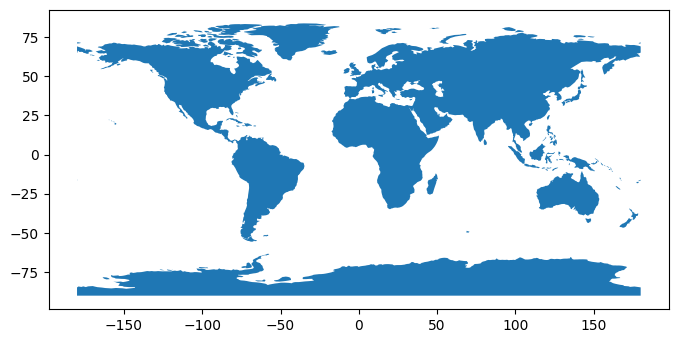

In [6]:
world.plot(figsize=(8,6))

every geospatial dataset uses a coordinate system like lat/long or meters.

In [7]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

EPSG:4326

That means WGS84 latitude/longitude coordinates.

<Axes: >

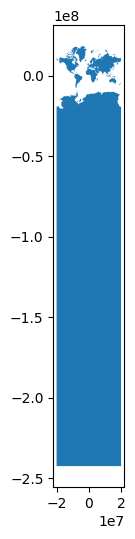

In [10]:
#change coordinate system
world_merc = world.to_crs(epsg=3857)
world_merc.plot(figsize=(10,6))

In [11]:
world_merc.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

This projection expresses coordinates in meters instead of degrees — the same one used by Google Maps, OpenStreetMap, etc.

However, because your sample dataset (geodatasets.get_path("naturalearth.land")) contains land polygons only (not the full world boundaries), it plots as a narrow vertical strip — that’s expected behavior.

In [16]:
import geodatasets

print(geodatasets.data.keys())

dict_keys(['geoda', 'ny', 'eea', 'abs', 'naturalearth'])


In [21]:
import geopandas as gpd
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
print("CRS before:", world.crs)
world_merc = world.to_crs(epsg=3857)
print("CRS after:", world_merc.crs)
print("Total bounds (minx, miny, maxx, maxy):", world_merc.total_bounds)

CRS before: EPSG:4326
CRS after: EPSG:3857
Total bounds (minx, miny, maxx, maxy): [-2.00375083e+07 -2.42528681e+08  2.00375083e+07  1.84400029e+07]


In [22]:
print("Empty geometries:", world_merc.geometry.is_empty.sum())
print("Invalid geometries:", (~world_merc.geometry.is_valid).sum())

Empty geometries: 0
Invalid geometries: 1


In [23]:
world_merc = world_merc.copy()
world_merc['area_m2'] = world_merc.geometry.area
world_merc[['name','area_m2']].sort_values('area_m2', ascending=False).head(10)

KeyError: "['name'] not in index"

In [24]:
world_merc.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry', 'area_m2'],
      dtype='object', length=170)

In [25]:
invalid_geom = world_merc[~world_merc.geometry.is_valid]
invalid_geom[["ADMIN", "SOVEREIGNT"]]

,ADMIN,SOVEREIGNT
14,Sudan,Sudan


In [26]:
world_merc["geometry"] = world_merc.buffer(0)
world_clean = world_merc[world_merc.geometry.is_valid]

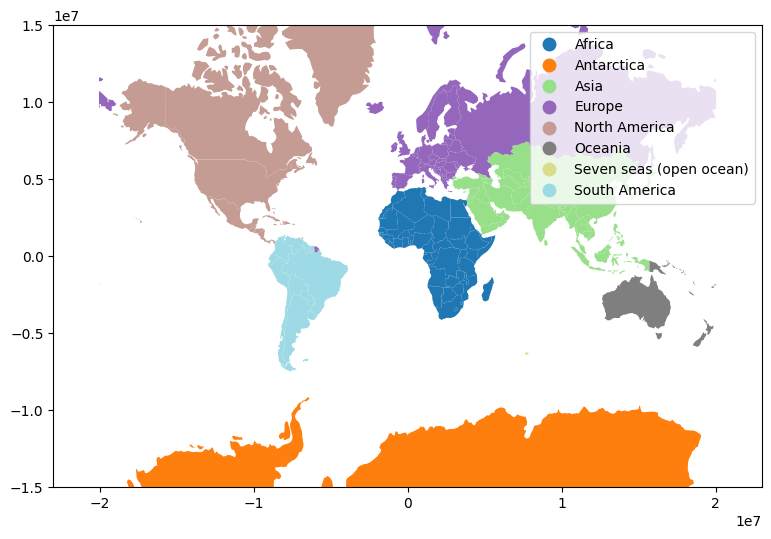

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
world_clean.plot(ax=ax, column="CONTINENT", legend=True, cmap="tab20")

ax.set_xlim(-2.3e7, 2.3e7)
ax.set_ylim(-1.5e7, 1.5e7)

ax.set_aspect('equal')

plt.show()

<Axes: >

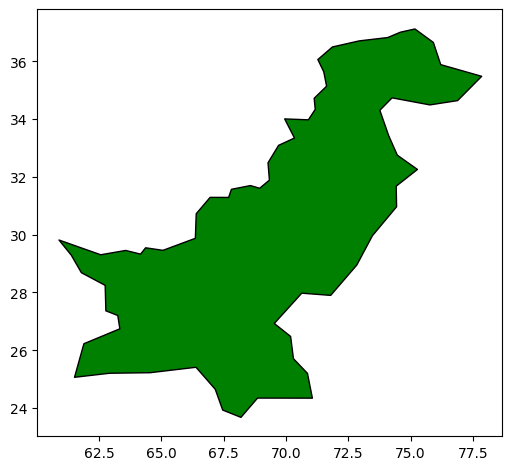

In [32]:
pakistan = world[world['ADMIN'] == 'Pakistan']
pakistan.plot(color='green', edgecolor='black', figsize=(6,6))

In [42]:
#computing geometric properties
pakistan_area = pakistan.geometry.area
pakistan_bounds = pakistan.geometry.bounds
pakistan_centroid = pakistan.geometry.centroid

print("Area (square degrees or meters):", pakistan_area.values)
print("\nBounds:\n", pakistan_bounds)
print("\nCentroid:", pakistan_centroid)

Area (square degrees or meters): [81.85580473]

Bounds:
           minx       miny       maxx       maxy
102  60.874248  23.691965  77.837451  37.133031

Centroid: 102    POINT (69.414 29.97346)
dtype: geometry


C:\Users\ibrah\AppData\Local\Temp\ipykernel_28288\1452026069.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pakistan_area = pakistan.geometry.area
C:\Users\ibrah\AppData\Local\Temp\ipykernel_28288\1452026069.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pakistan_centroid = pakistan.geometry.centroid


In [ ]:
#combine with pandas style data

#e.g. total population by continent - using existing cols
gdp_summary = world.groupby('CONTINENT')['POP_EST'].sum().reset_index()

#merge the summary back into the world dataframe
world = world.merge(gdp_summary, on='CONTINENT', suffixes=('', '_CONTINENT_TOTAL'))

#displaying a few relevant cols
world[['ADMIN', 'POP_EST', 'POP_EST_CONTINENT_TOTAL']].head()

,ADMIN,POP_EST,POP_EST_CONTINENT_TOTAL
0,Fiji,889953.0,4.120487e+07
1,United Republic of Tanzania,58005463.0,1.306370e+09
2,Western Sahara,603253.0,1.306370e+09
3,Canada,37589262.0,5.837560e+08
4,United States of America,328239523.0,5.837560e+08


What’s happening here

1. We group by CONTINENT.
2. We sum up POP_EST (total population for each continent).
3. We merge that summary back to each country.

So each row (country) now knows both:

- its own population (POP_EST)
- its continent’s total population (POP_EST_CONTINENT_TOTAL)

In [46]:
#save to GeoJSON file
world.to_file(r"C:\Ibrahim\Personal\University Stuff\Machine Learning\Project\ML Irrigation Project\data\processed\world_map.geojson", driver="GeoJSON")

In [47]:
world2 = gpd.read_file(r"C:\Ibrahim\Personal\University Stuff\Machine Learning\Project\ML Irrigation Project\data\processed\world_map.geojson")

world2.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,POP_EST_CONTINENT_TOTAL,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,4.120487e+07,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,1.306370e+09,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,1.306370e+09,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,5.837560e+08,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,5.837560e+08,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [ ]:
#testing something here.